In [17]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() # Load data

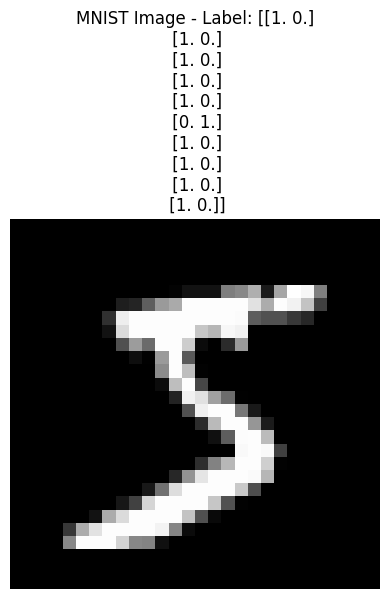

In [20]:
plt.imshow(train_images[0], cmap='gray')  # Use 'gray' colormap for grayscale images
plt.title(f'MNIST Image - Label: {train_labels[0]}')
plt.axis('off')  # Turn off axis labels
plt.show()

In [3]:
train_images = train_images.reshape((60000,28,28,1)) # BATCH SIZE, HEIGHT, WIDTH, CHANNELS
train_images = train_images.astype('float32')/255 # NORMALIZE DATA TO 0-1 RANGE (GREYSCALE) 

test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype('float32')/255

In [15]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels) # ONE-HOT ENCODE LABELS
test_labels = to_categorical(test_labels)

In [8]:
INPUT_SHAPE = (28,28,1) # HEIGHT, WIDTH, CHANNELS

In [9]:
# TEST METRICS:

# model.evaluate(test_images, test_labels)

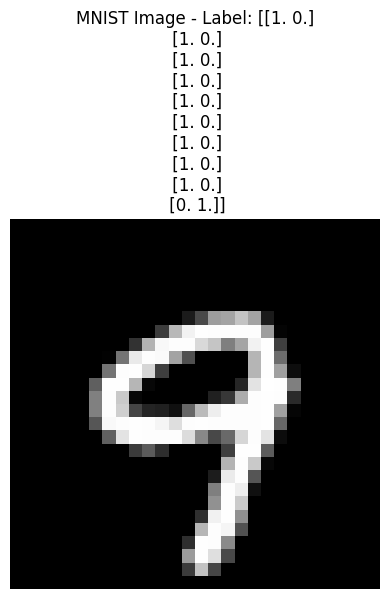

In [25]:
# SAMPLE
import random

test_image_index = random.randrange(0, len(test_images))
plt.imshow(test_images[test_image_index], cmap='gray')  # Use 'gray' colormap for grayscale images
plt.title(f'MNIST Image - Label: {test_labels[test_image_index]}')
plt.axis('off') 
plt.show()

In [31]:
print(f"Model Predicts that the number is a: {np.argmax(model.predict(test_images[test_image_index].reshape(1,28,28,1)))}")

1/1 [==============================] - 0s 11ms/step
Model Predicts that the number is a: 9
